In [4]:
!pip install statsmodels

     ---------------------------------------- 9.1/9.1 MB 41.6 MB/s eta 0:00:00
     ---------------------------------------- 234.1/234.1 kB ? eta 0:00:00


In [5]:
%load_ext watermark
%watermark -v -p sklearn,numpy,scipy,matplotlib,statsmodels,seaborn

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.7.13
IPython version      : 7.33.0

sklearn    : 1.0.2
numpy      : 1.21.5
scipy      : 1.7.3
matplotlib : 3.5.3
statsmodels: 0.13.5
seaborn    : 0.12.2



In [6]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats
import itertools
import time
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pylab

# 실습 예제 1 : ram price 데이터 셋

### 예제 데이터 불러오기

Text(0, 0.5, 'Price ($/Mbyte)')

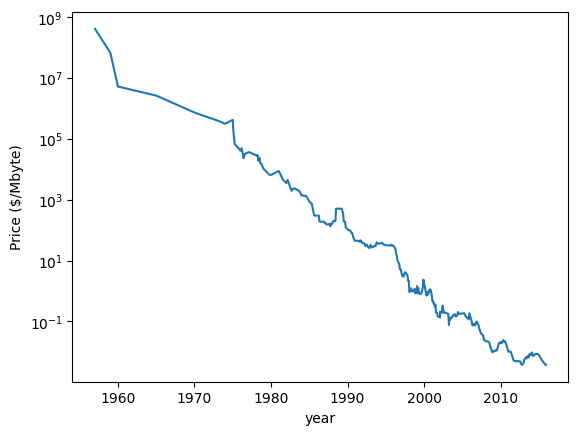

In [3]:
ram_prices = pd.read_csv('../Data/ram_price.csv')

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("year")
plt.ylabel("Price ($/Mbyte)")

Text(0, 0.5, 'Raw Price')

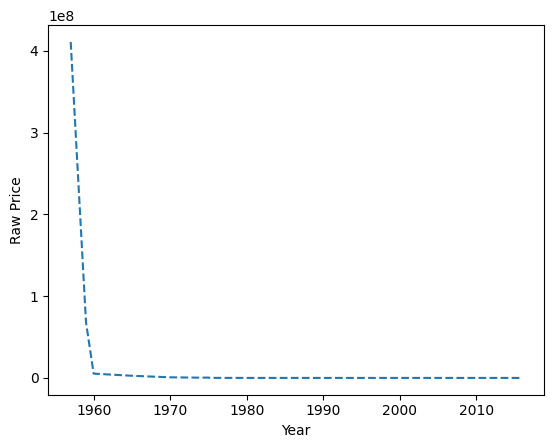

In [4]:
plt.plot(ram_prices.date, ram_prices.price, '--')
plt.xlabel("Year")
plt.ylabel("Raw Price")

In [5]:
from sklearn.linear_model import LinearRegression

In [12]:
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다.
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용합니다.
X_train = data_train.date[:, np.newaxis]

# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다.
y_train = np.log(data_train.price)

#실제로 다중선형회귀모델의 함수를 정의하고 학습하는 구문
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다.
X_all = ram_prices.date[:, np.newaxis]

pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌립니다.
price_lr = np.exp(pred_lr)

c:\Users\camar\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
c:\Users\camar\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  from ipykernel import kernelapp as app


실제값과 예측된 값을 시각화하여 확인한다.

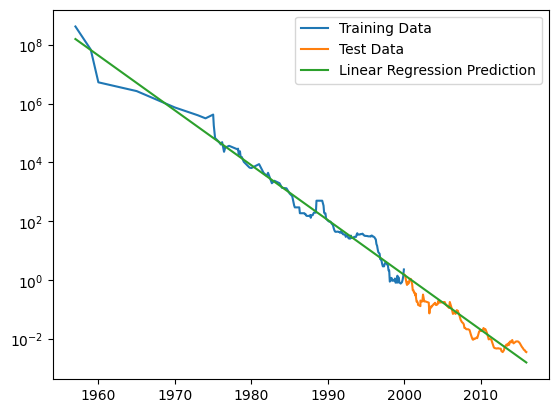

In [15]:
plt.semilogy(data_train.date, data_train.price, label = "Training Data")
plt.semilogy(data_test.date, data_test.price, label = "Test Data")
plt.semilogy(ram_prices.date, price_lr, label = "Linear Regression Prediction")
plt.legend()

회귀 계수 확인해보기

In [16]:
print("연도에 따른 회귀 계수 (로그 변환):", linear_reg.coef_)

연도에 따른 회귀 계수 (로그 변환): [-0.42880156]


In [ ]:
regression_model = LinearRegression()

regression_model.fit(X_train, y_train)

regression_model.coef_ #회귀 계수

regression_model.predict() # 예측